<a href="https://colab.research.google.com/github/nxxk23/PROJECT/blob/main/FeatureSelection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
data = pd.read_excel('/content/drive/MyDrive/ckdresearch2023/Assign/Assign8 : SplitFold /3_Group_5_Fold.xlsx')
data = data.iloc[:, 1:]
data

,PatientUID,PatientVisitUID,Slopes,InPatient,OutPatient,Emergency,time_t1,eGFR_t1,VisitLocation,StartDTTM,...,L19-Blood-sugar,L20-HbA1c,L21-Cholesterol,L22-Triglyceride,L23-LDL-Cholesterol,L24-HDL-Cholesterol,L28-UrineProtein-Cr-ratio,LabLocation,Group,Fold
0,2299,6947220,-12.812245,0,1,0,2021-03-04 10:01:42.113,48.54,เวชปฏิบัติทั่วไป (OPD)-D03,2019-12-19 08:19:38.647,...,89.00,5.562,205.00,69.00,139.00,76.00,36.916,1,bad,1
1,2299,3386255,-7.158596,0,1,0,2017-10-03 09:19:54.710,63.60,เวชปฏิบัติทั่วไป (OPD)-D03,2016-08-15 08:13:26.043,...,91.00,5.284,215.00,81.00,123.00,99.00,21.019,1,bad,1
2,2299,5812902,-6.063710,0,1,0,2019-12-19 09:51:24.427,64.02,เวชปฏิบัติทั่วไป (OPD)-D03,2018-12-12 07:58:57.190,...,100.00,5.300,193.00,62.00,129.00,65.00,30.879,1,bad,1
3,2299,4546471,5.550691,0,1,0,2018-12-12 09:18:49.913,70.20,เวชปฏิบัติทั่วไป (OPD)-D03,2017-10-03 07:37:22.777,...,86.00,5.755,219.00,64.00,146.00,73.00,15.198,1,good,1
4,2299,8186767,28.287500,0,1,0,2022-04-21 08:45:54.580,80.47,เวชปฏิบัติทั่วไป (OPD)-D03,2021-03-04 07:55:40.703,...,88.00,5.500,198.00,74.00,129.00,60.00,28.684,1,good,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52615,3319961,9270330,-4.256753,0,1,0,2023-04-04 08:28:58.833,33.68,บูรณาการนอกเวลา (คลินิก)-OD191,2022-03-14 14:31:31.910,...,103.00,5.900,165.00,311.00,84.00,43.00,131.300,1,bad,4
52616,3319971,9270331,-0.692078,0,1,0,2023-04-04 08:49:20.047,26.47,บูรณาการนอกเวลา (คลินิก)-OD191,2022-03-14 14:31:53.720,...,99.00,7.100,154.00,196.00,83.00,42.00,325.800,1,bad,0
52617,3320048,9242721,7.217875,0,0,1,2023-04-10 08:36:15.217,70.36,OPD AE-DV191,2022-03-05 12:36:33.263,...,123.99,6.457,112.00,96.00,64.00,33.00,104.371,1,good,1
52618,3320050,9257281,-32.794557,0,1,0,2023-04-10 08:58:57.267,30.69,หน่วยคลินิกเฉพาะทางศูนย์บริการทางการแพทย์ชั้นเลิศ,2022-03-10 07:42:44.243,...,96.00,5.715,202.31,93.29,136.63,67.35,27.246,1,bad,2


In [3]:
data = data.sort_values(['PatientUID', 'PatientVisitUID'])
data['TimeDiff'] = data.groupby('PatientUID')['LabCwhen'].diff().dt.days / 365
data['TimeDiff'] = data['TimeDiff'].fillna(0)

In [4]:
data['time_t1'] = pd.to_datetime(data['time_t1'])

In [5]:
columns_to_encode = ['VisitLocation', 'Group']

# Apply label encoding using map
for column in columns_to_encode:
    encoding_map = {category: i for i, category in enumerate(data[column].unique())}
    data[column] = data[column].map(encoding_map)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52620 entries, 1 to 52619
Data columns (total 85 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   PatientUID                    52620 non-null  int64         
 1   PatientVisitUID               52620 non-null  int64         
 2   Slopes                        52620 non-null  float64       
 3   InPatient                     52620 non-null  int64         
 4   OutPatient                    52620 non-null  int64         
 5   Emergency                     52620 non-null  int64         
 6   time_t1                       52620 non-null  datetime64[ns]
 7   eGFR_t1                       52620 non-null  float64       
 8   VisitLocation                 52620 non-null  int64         
 9   StartDTTM                     52620 non-null  datetime64[ns]
 10  EndDttm                       52620 non-null  datetime64[ns]
 11  LabCwhen                    

In [7]:
df = data.copy()

**split train test in each fold**

In [8]:
from sklearn.model_selection import KFold
import pandas as pd
from sklearn.preprocessing import StandardScaler

X = data.drop(['Slopes', 'PatientUID', 'PatientVisitUID', 'eGFR_t1', 'time_t1', 'StartDTTM', 'EndDttm', 'LabCwhen', 'VisitLocation', 'LabLocation'], axis=1) #we have to do the features selection
y = data['Slopes']

num_folds = 5  # Specify the number of folds
kf = KFold(n_splits=num_folds, shuffle=True, random_state=None)  # Set shuffle to True

# Get the unique fold values
all_folds = data['Fold'].unique()

X_train_scaled_list = []  # List to store X_train_scaled for each fold
y_train_list = []  # List to store y_train for each fold
X_test_scaled_list = []  # List to store X_test_scaled for each fold
y_test_list = []  # List to store y_test for each fold

for train_folds, test_fold in kf.split(all_folds):
    train_folds = all_folds[train_folds]
    test_fold = all_folds[test_fold][0]

    # Select rows with the corresponding folds
    train_indices = data['Fold'].isin(train_folds)
    test_indices = data['Fold'] == test_fold

    X_train, X_test = X[train_indices], X[test_indices]
    y_train, y_test = y[train_indices], y[test_indices]

    # Standardize the data
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
    # Store the scaled data for each fold
    X_train_scaled_list.append(X_train_scaled)
    y_train_list.append(y_train)
    X_test_scaled_list.append(X_test_scaled)
    y_test_list.append(y_test)

# Access the X_train_scaled and y_train for each fold
for fold, (X_train_scaled_fold, y_train_fold, X_test_scaled_fold, y_test_fold, train_fold_indices) in enumerate(
    zip(X_train_scaled_list, y_train_list, X_test_scaled_list, y_test_list, kf.split(all_folds))
):
    train_folds, test_fold = train_fold_indices

    print(f"Fold {fold + 1}:")
    print(f"Training set size : {X_train_scaled_fold.shape}")
    print(f"Test set size: {X_test_scaled_fold.shape}")
    print(f"Folds in training set: {train_folds.tolist()}")
    print(f"Folds in test set: {test_fold}")
    print("---\n")

Fold 1:
Training set size : (42027, 75)
Test set size: (10593, 75)
Folds in training set: [0, 1, 2, 4]
Folds in test set: [3]
---

Fold 2:
Training set size : (41978, 75)
Test set size: (10642, 75)
Folds in training set: [0, 1, 2, 3]
Folds in test set: [4]
---

Fold 3:
Training set size : (42184, 75)
Test set size: (10436, 75)
Folds in training set: [0, 2, 3, 4]
Folds in test set: [1]
---

Fold 4:
Training set size : (42017, 75)
Test set size: (10603, 75)
Folds in training set: [0, 1, 3, 4]
Folds in test set: [2]
---

Fold 5:
Training set size : (42274, 75)
Test set size: (10346, 75)
Folds in training set: [1, 2, 3, 4]
Folds in test set: [0]
---



## **RF**

In [9]:
import warnings

# Filter out specific FutureWarnings
warnings.filterwarnings("ignore", category=FutureWarning, message="`max_features='auto'` has been deprecated")


### **GridSearch**



In [11]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Prepare hyperparameter grid for GridSearchCV
parameters = {
    'n_estimators': [100, 150, 200, 250, 300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [1, 2, 3, 4]
}

# Perform a single grid search
regr = RandomForestRegressor(random_state=0)
clf = GridSearchCV(regr, parameters, cv=5)  # Specify the desired number of inner folds
clf.fit(X_train_scaled, y_train)  # Use the entire training dataset

# Access the best hyperparameters
best_params = clf.best_params_
print(f"Best hyperparameters: {best_params}")


Best hyperparameters: {'max_depth': 4, 'max_features': 'auto', 'n_estimators': 200}


### **FeatureSelection**

In [12]:
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
from sklearn.preprocessing import StandardScaler

X = data.drop(['Slopes', 'PatientUID', 'PatientVisitUID', 'eGFR_t1', 'time_t1', 'StartDTTM', 'EndDttm', 'LabCwhen', 'VisitLocation', 'LabLocation'], axis=1)
y = data['Slopes']

num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True, random_state=None)

all_folds = data['Fold'].unique()

rf_feature_importances_list = []

for train_folds, test_fold in kf.split(all_folds):
    train_folds = all_folds[train_folds]
    test_fold = all_folds[test_fold][0]

    # Select rows with the corresponding folds
    train_indices = data['Fold'].isin(train_folds)
    test_indices = data['Fold'] == test_fold

    X_train, X_test = X[train_indices], X[test_indices]
    y_train, y_test = y[train_indices], y[test_indices]

    # Standardize the data
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)

    # Train a Random Forest model
    rf_model = RandomForestRegressor(max_depth = 4, max_features = 'auto', n_estimators = 200)
    rf_model.fit(X_train_scaled, y_train)

    # Get feature importances
    rf_feature_importances = rf_model.feature_importances_

    # Store feature importances for each fold
    rf_feature_importances_list.append(rf_feature_importances)

# Average feature importances across all folds
rf_average_feature_importances = pd.DataFrame(rf_feature_importances_list).mean()

# Display feature importances
print("RF Average Feature Importances:")
print(rf_average_feature_importances.sort_values(ascending=False))


RF Average Feature Importances:
72    0.799196
50    0.152491
28    0.013617
52    0.009054
0     0.007511
        ...   
15    0.000000
27    0.000000
42    0.000000
44    0.000000
43    0.000000
Length: 75, dtype: float64


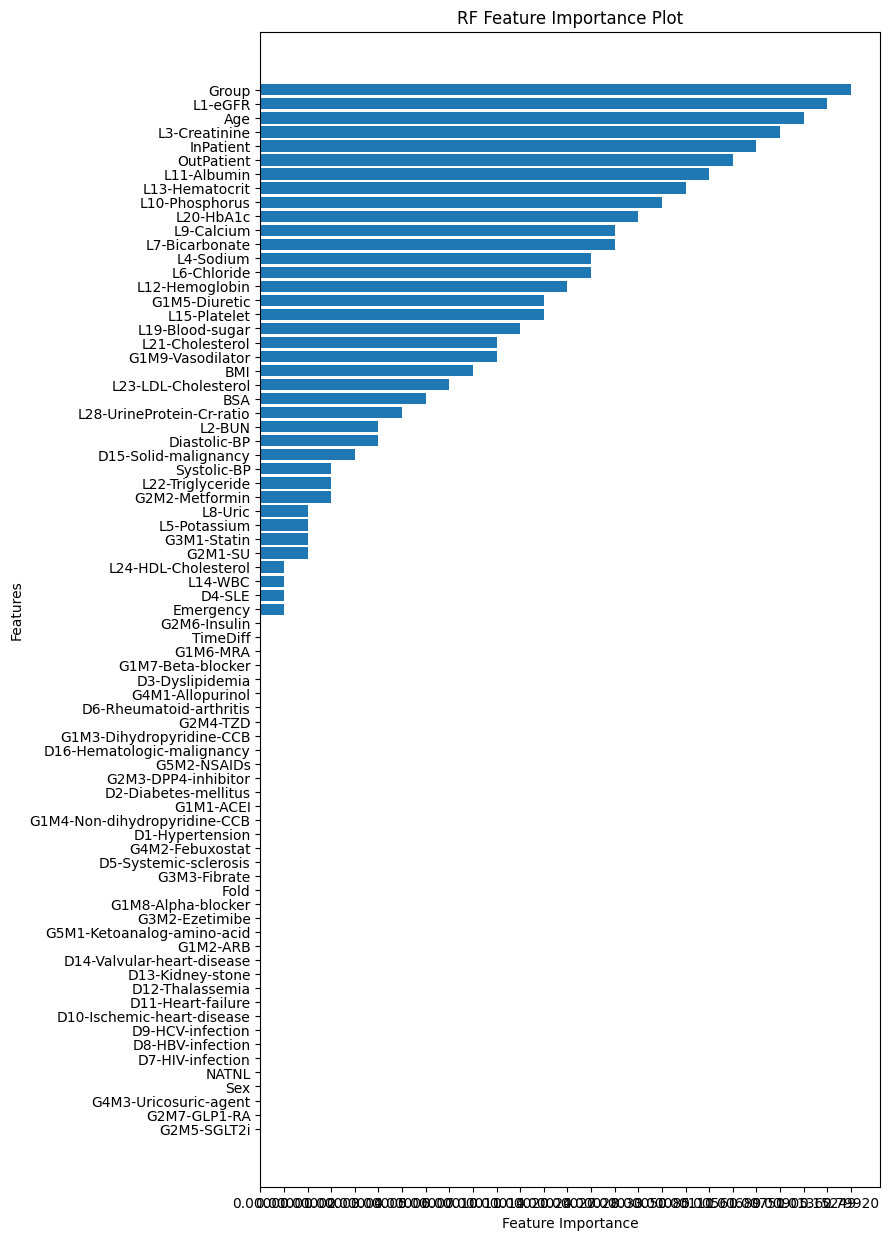

In [15]:
import matplotlib.pyplot as plt
feature_names = X.columns
rf = list(zip(feature_names, rf_average_feature_importances))
rf.sort(key=lambda x: x[1])
# Plotting
plt.figure(figsize=(8, 15))
plt.barh([x[0] for x in rf], ['{:.5f}'.format(x[1]) for x in rf])
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('RF Feature Importance Plot')
plt.show()

plt.show()

In [16]:
rf_selected = [(feature_names) for feature_names, rf_average_feature_importances in rf if rf_average_feature_importances > 0.00001]
data[rf_selected]

,L24-HDL-Cholesterol,G2M1-SU,G3M1-Statin,L5-Potassium,L8-Uric,G2M2-Metformin,L22-Triglyceride,Systolic-BP,D15-Solid-malignancy,Diastolic-BP,...,L20-HbA1c,L10-Phosphorus,L13-Hematocrit,L11-Albumin,OutPatient,InPatient,L3-Creatinine,Age,L1-eGFR,Group
1,99.00,0,0,4.557,4.481,0,81.00,127.0,0,75.0,...,5.284,3.244,39.367,4.652,1,0,0.80,73,71.70,0
3,73.00,0,90,4.743,3.800,0,64.00,105.0,0,64.0,...,5.755,3.787,41.270,4.729,1,0,0.90,74,63.60,1
2,65.00,0,100,3.800,4.322,0,62.00,138.0,0,76.0,...,5.300,3.486,32.400,3.798,1,0,0.82,75,70.20,0
0,76.00,0,0,4.300,4.528,0,69.00,134.0,0,66.0,...,5.562,3.615,39.053,4.390,1,0,0.88,76,64.02,0
4,60.00,0,0,4.400,5.298,0,74.00,103.0,0,57.0,...,5.500,3.816,34.600,4.194,1,0,1.10,78,48.54,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52615,43.00,0,100,4.200,8.581,100,311.00,134.0,0,78.0,...,5.900,3.900,42.100,5.000,1,0,1.85,63,38.17,0
52616,42.00,0,100,4.400,8.398,0,196.00,127.0,0,57.0,...,7.100,4.300,40.600,4.300,1,0,1.85,71,27.20,0
52617,33.00,0,0,4.300,8.003,0,96.00,130.0,0,87.0,...,6.457,3.400,35.000,3.100,0,0,1.21,66,62.45,1
52618,67.35,0,0,4.900,5.446,0,93.29,137.0,0,83.0,...,5.715,3.645,39.000,4.630,1,0,1.14,67,66.18,0


### **TrainModel**
> MAE เยอะขึ้น อ่าฮ่า

In [19]:
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
import pandas as pd
from sklearn.preprocessing import StandardScaler

X = data[rf_selected + ['Fold']]
y = data['Slopes']

num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True, random_state=None)

# Lists to store trained models
models = []

for fold, (train_indices, test_indices) in enumerate(kf.split(X)):
    X_train = data.iloc[train_indices][rf_selected + ['Fold']]
    X_test = data.iloc[test_indices][rf_selected + ['Fold']]
    y_train, y_test = y.iloc[train_indices], y.iloc[test_indices]

    # Standardize the data
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train[rf_selected])
    X_test_scaled = scaler.transform(X_test[rf_selected])
    X_train_scaled = pd.DataFrame(X_train_scaled, columns=rf_selected)

    # Train a RandomForestRegressor model
    regr_fold = RandomForestRegressor(**best_params)
    regr_fold.fit(X_train_scaled, y_train)

    models.append(regr_fold)

    # Calculate MAE for each fold
    mae_train = mean_absolute_error(y_train, regr_fold.predict(X_train_scaled))
    mae_test = mean_absolute_error(y_test, regr_fold.predict(X_test_scaled))

    print(f'Fold {fold + 1}:')
    print(f'MAE_train: {mae_train}')
    print(f'MAE_test: {mae_test}')
    print("---")


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Fold 1:
MAE_train: 3.910230355253081
MAE_test: 3.9383388397231434
---


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Fold 2:
MAE_train: 3.9069602818235634
MAE_test: 3.937041433921244
---


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Fold 3:
MAE_train: 3.899760200656087
MAE_test: 3.93850518664007
---


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Fold 4:
MAE_train: 3.896417722760709
MAE_test: 3.9652044682171708
---
Fold 5:
MAE_train: 3.9240461907279154
MAE_test: 3.865263137703659
---


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


> **ต้องหาทางปรับพารามิเตอร์ไม่ก็เลือกฟีเจอร์ใหม่**

# **LS**

### **GridSearch**

In [20]:
import numpy as np
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, train_test_split

lasso_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('lasso', Lasso())
])

params = {
    "lasso__alpha": np.arange(0.01, 0.1, 0.5),
    "lasso__fit_intercept": [True, False],  # Move fit_intercept inside the lasso step
    "lasso__max_iter": [3000, 4000, 5000],
    "lasso__tol": [1e-4, 1e-3, 1e-2]
}

lasso_cv = GridSearchCV(lasso_pipeline, param_grid=params, cv=5)
lasso_cv.fit(X_train_scaled, y_train)

best_params_lasso = lasso_cv.best_params_
print("Best Params {}".format(best_params_lasso))

Best Params {'lasso__alpha': 0.01, 'lasso__fit_intercept': True, 'lasso__max_iter': 3000, 'lasso__tol': 0.01}


### **FeatureSelection**

In [21]:
from sklearn.model_selection import KFold
from sklearn.linear_model import Lasso
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

X = data.drop(['Slopes', 'PatientUID', 'PatientVisitUID', 'eGFR_t1', 'time_t1', 'StartDTTM', 'EndDttm', 'LabCwhen', 'VisitLocation', 'LabLocation'], axis=1)
y = data['Slopes']

num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True, random_state=None)

all_folds = data['Fold'].unique()

lasso_coef_list = []

lasso_params = {'alpha': 0.01, 'fit_intercept': True, 'max_iter': 3000, 'tol': 0.01}

for train_folds, test_fold in kf.split(all_folds):
    train_folds = all_folds[train_folds]
    test_fold = all_folds[test_fold][0]

    # Select rows with the corresponding folds
    train_indices = data['Fold'].isin(train_folds)
    test_indices = data['Fold'] == test_fold

    X_train, X_test = X[train_indices], X[test_indices]
    y_train, y_test = y[train_indices], y[test_indices]

    # Standardize the data for Lasso
    scaler_lasso = StandardScaler()
    X_train_scaled_lasso = scaler_lasso.fit_transform(X_train)
    X_test_scaled_lasso = scaler_lasso.transform(X_test)
    X_train_scaled_lasso = pd.DataFrame(X_train_scaled_lasso, columns=X_train.columns)

    # Train a Lasso model
    lasso_model = Lasso(**lasso_params)
    lasso_model.fit(X_train_scaled_lasso, y_train)

    # Get feature importances for Lasso
    lasso_coef = np.abs(lasso_model.coef_)
    lasso_coef_list.append(lasso_coef)

# Average coefficients across all folds for Lasso
lasso_average_coef = pd.DataFrame(lasso_coef_list).mean()
lasso_coef_sorted = lasso_average_coef.abs().sort_values(ascending=True)
print("LS Average Feature Importances:")
print(lasso_coef_sorted)


LS Average Feature Importances:
25    0.000000
26    0.000984
41    0.003403
40    0.005146
73    0.007033
        ...   
33    0.397608
0     0.397668
66    0.550626
50    3.227113
72    4.400472
Length: 75, dtype: float64


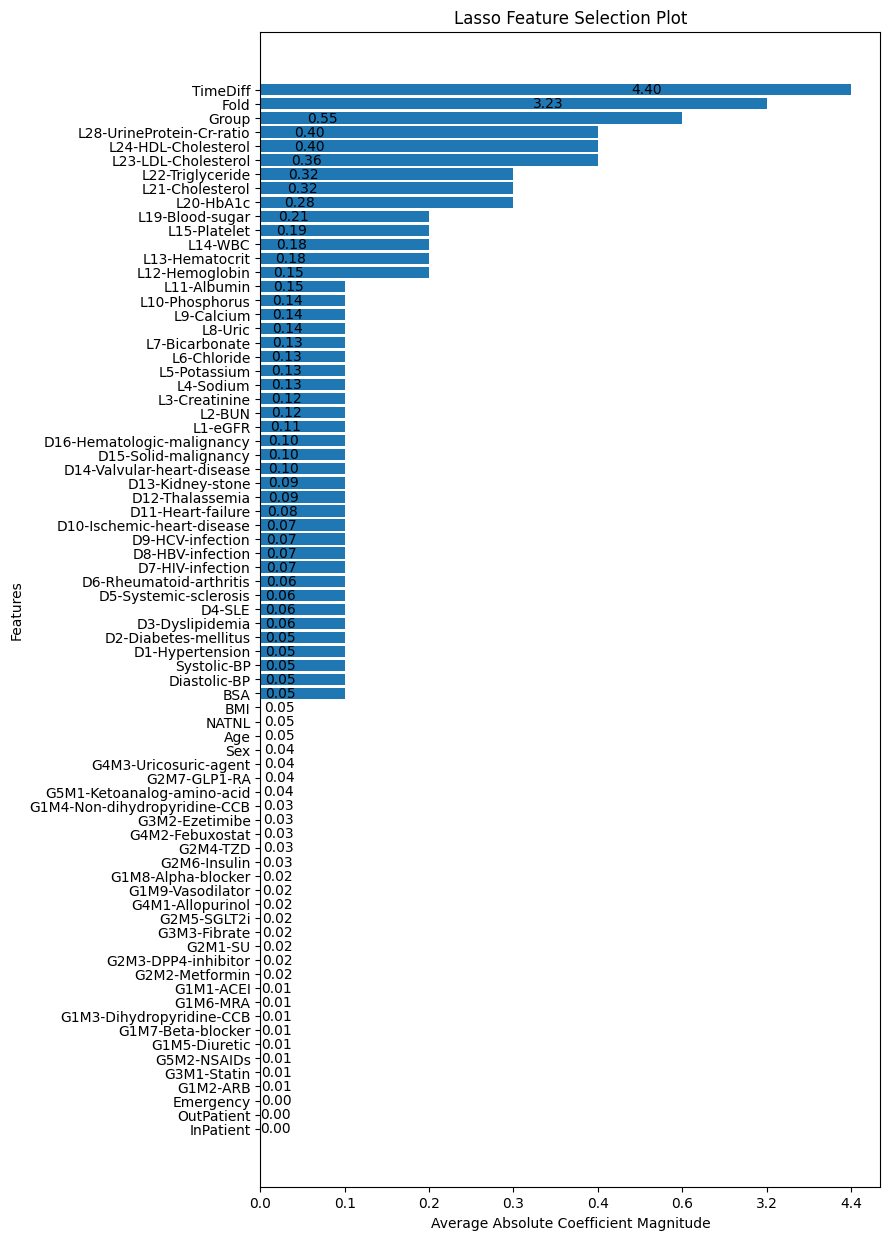

In [22]:
import matplotlib.pyplot as plt

feature_names = X.columns
ls = list(zip(feature_names, lasso_coef_sorted))
ls.sort(key=lambda x: x[1])

# Plotting
plt.figure(figsize=(8, 15))
plt.barh([x[0] for x in ls], ['{:.1f}'.format(x[1]) for x in ls])
plt.xlabel('Average Absolute Coefficient Magnitude')
plt.ylabel('Features')
plt.title('Lasso Feature Selection Plot')

# Annotate the bars with their values
for index, value in enumerate(ls):
    plt.text(value[1], index, f'{value[1]:.2f}', ha='left', va='center')

plt.show()


In [46]:
ls_selected = [feature_names for feature_names, coef in ls if coef >= 0.0]
data[ls_selected]

,InPatient,OutPatient,Emergency,G1M2-ARB,G3M1-Statin,G5M2-NSAIDs,G1M5-Diuretic,G1M7-Beta-blocker,G1M3-Dihydropyridine-CCB,G1M6-MRA,...,L19-Blood-sugar,L20-HbA1c,L21-Cholesterol,L22-Triglyceride,L23-LDL-Cholesterol,L24-HDL-Cholesterol,L28-UrineProtein-Cr-ratio,Group,Fold,TimeDiff
1,0,1,0,90,0,0,0,0,0,0,...,91.00,5.284,215.00,81.00,123.00,99.00,21.019,0,1,0.000000
3,0,1,0,90,90,0,0,0,0,0,...,86.00,5.755,219.00,64.00,146.00,73.00,15.198,1,1,1.131507
2,0,1,0,100,100,34,0,0,0,0,...,100.00,5.300,193.00,62.00,129.00,65.00,30.879,0,1,1.191781
0,0,1,0,35,0,1,35,0,0,0,...,89.00,5.562,205.00,69.00,139.00,76.00,36.916,0,1,1.016438
4,0,1,0,100,0,15,0,0,0,0,...,88.00,5.500,198.00,74.00,129.00,60.00,28.684,1,1,1.208219
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52615,0,1,0,100,100,0,0,0,0,0,...,103.00,5.900,165.00,311.00,84.00,43.00,131.300,0,4,0.000000
52616,0,1,0,0,100,0,0,0,0,0,...,99.00,7.100,154.00,196.00,83.00,42.00,325.800,0,0,0.000000
52617,0,0,1,0,0,0,0,0,0,0,...,123.99,6.457,112.00,96.00,64.00,33.00,104.371,1,1,0.000000
52618,0,1,0,0,0,0,0,0,0,0,...,96.00,5.715,202.31,93.29,136.63,67.35,27.246,0,2,0.000000


### **TrainModel**

In [47]:
from sklearn.model_selection import KFold
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Assuming ls_selected contains the selected features
X = data[ls_selected]
y = data['Slopes']

num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True, random_state=None)

lasso_params = {'alpha': 0.01, 'fit_intercept': True, 'max_iter': 3000, 'tol': 0.01}

# Lists to store trained models and metrics
models = []
mae_train_list = []
mae_test_list = []

for fold, (train_indices, test_indices) in enumerate(kf.split(X)):
    X_train, X_test = X.iloc[train_indices], X.iloc[test_indices]
    y_train, y_test = y.iloc[train_indices], y.iloc[test_indices]

    # Standardize the data
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Train a Lasso model
    lsgr_fold = Lasso(**lasso_params)
    lsgr_fold.fit(X_train_scaled, y_train)

    models.append(lsgr_fold)

    # Calculate MAE for each fold
    mae_train = mean_absolute_error(y_train, lsgr_fold.predict(X_train_scaled))
    mae_test = mean_absolute_error(y_test, lsgr_fold.predict(X_test_scaled))

    mae_train_list.append(mae_train)
    mae_test_list.append(mae_test)

    print(f'Fold {fold + 1}:')
    print(f'MAE_train: {mae_train}')
    print(f'MAE_test: {mae_test}')
    print("---")

# Calculate and print average MAE across all folds
avg_mae_train = sum(mae_train_list) / len(mae_train_list)
avg_mae_test = sum(mae_test_list) / len(mae_test_list)

print("Average MAE across all folds:")
print(f'Train: {avg_mae_train}')
print(f'Test: {avg_mae_test}')


Fold 1:
MAE_train: 5.357155423655329
MAE_test: 5.418111465067753
---
Fold 2:
MAE_train: 5.354129769991507
MAE_test: 5.451729328607209
---
Fold 3:
MAE_train: 5.393121326677367
MAE_test: 5.32029846448441
---
Fold 4:
MAE_train: 5.361493318896739
MAE_test: 5.422292803569944
---
Fold 5:
MAE_train: 5.392129480741288
MAE_test: 5.291075931665943
---
Average MAE across all folds:
Train: 5.371605863992446
Test: 5.380701598679051


# **FNN**

In [ ]:
print("X_train.columns[top_k_indices] Shape:", X_train.columns[top_k_indices].shape)
print("y_train Shape:", y_train.shape)
print("X_train Shape:", X_train.shape)


In [ ]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error

best_feature_sets_fnn = []

# Loop over each fold
for fold, (X_train_fold, y_train_fold, X_test_fold, y_test_fold, train_fold_indices) in enumerate(
    zip(X_train_scaled_list, y_train_list, X_test_scaled_list, y_test_list, kf.split(all_folds))
):
    train_folds, test_fold = train_fold_indices

    print(f"Fold {fold + 1}:")

    # Data Splitting
    X_train, X_test = X_train_fold, X_test_fold
    y_train, y_test = y_train_fold, y_test_fold

    # Feature Selection using RandomForestRegressor
    rf = RandomForestRegressor()
    rf.fit(X_train, y_train)
    # Get feature importances
    feature_importances = np.array(rf.feature_importances_)

    # Select top k features
    k = min(30, len(X_train.columns))  # รับ k ให้ไม่เกินจำนวน feature ทั้งหมด
    top_k_indices = feature_importances.argsort()[-k:][::-1]

    # Store the best features for this fold
    #best_feature_sets_fnn.append(X_train.columns[top_k_indices])
    best_feature_sets_fnn.append(X_train.columns[top_k_indices].tolist())



    # Print the top features and their importances
    print("Top Features:")
    # for i, index in enumerate(top_k_indices):
    #     print(f"{i + 1}. Feature: {X.columns[index]}, Importance: {feature_importances[index]:.3f}")

    # GridSearchCV for Hyperparameter Tuning
    parameters_fnn = {
        'hidden_layer_sizes': [(64,), (128,), (256,)],
        'activation': ['relu', 'tanh', 'logistic'],
        'solver': ['sgd', 'adam'],
        'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1],
        'learning_rate': ['constant', 'invscaling', 'adaptive'],
        'max_iter': [1000, 1500, 2000],  # You can try increasing this value
        'tol': [1e-4, 1e-3, 1e-2]  # You can try decreasing this value
    }

    # Perform a single grid search
    fnn_model = MLPRegressor(random_state=0)
    clf_fnn = GridSearchCV(fnn_model, parameters_fnn, cv=5)

    # Fit GridSearchCV on the selected features for this fold
    clf_fnn.fit(X_train.iloc[:, top_k_indices].values, y_train)


    # Access the best hyperparameters
    best_params_fnn = clf_fnn.best_params_
    print(f"Best hyperparameters: {best_params_fnn}")

    # Train a model using the best hyperparameters for this fold
    fnn_fold = MLPRegressor(random_state=0, **best_params_fnn)
    fnn_fold.fit(X_train.iloc[:, top_k_indices], y_train)

    # Calculate MAE for this fold
    mae_train_fnn = mean_absolute_error(y_train, fnn_fold.predict(X_train.iloc[:, top_k_indices]))
    mae_test_fnn = mean_absolute_error(y_test, fnn_fold.predict(X_test.iloc[:, top_k_indices]))

    print(f'MAE_train: {mae_train_fnn}')
    print(f'MAE_test: {mae_test_fnn}')
    print("---")
